# Ⅰ. NLP Framework와 Huggingface

# 1. NLP Framework

## (1) AllenNLP Guide
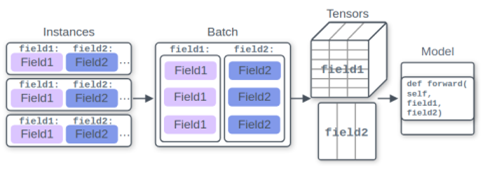

## (2) fast.ai
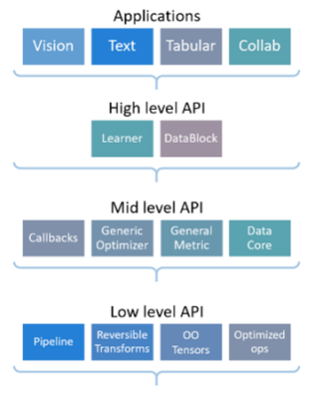

# 2. Why Huggingface?

### 1) 광범위하고 신속한 NLP 모델 지원
- Huggingface는 많은 사람들이 최신 NLP 모델들을 더욱 손쉽게 사용하는 것을 목표로 만들기 시작했다고 합니다. 그래서 그런지 새로운 논문들이 발표될 때마다, 본인들의 framework에 흡수시키고 있습니다. 또한, pretrained model을 제공하고, dataset과 tokenizer를 더욱 쉽게 이용할 수 있도록 framework화시키고 있는 행보도 보이고 있습니다. 다른 framework들도 이런 작업을 하지 않는 것은 아니지만, Huggingface의 지원 범위가 가장 광범위하고, 최신 논문을 지원하는 속도도 빠릅니다.

### 2) PyTorch와 Tensorflow 모두에서 사용 가능
- transformers는 기본적으로 PyTorch를 기반으로 만들어져있습니다. 많은 utility가 PyTorch 위주로 작성이 되어있긴 하지만, 최근에는 Tensorflow로도 학습하고 사용할 수 있게끔 계속해서 framework를 확장하고 있는 중입니다. 이렇듯 Huggingface transformers를 바탕으로 Tensorflow와 PyTorch라는 Backend의 한계를 뛰어넘어 어떤 환경에든 쉽게 적용 가능한 표준 framework의 지위를 다져가고 있습니다.

### 3) 잘 설계된 framework 구조
- HuggingFace의 목표처럼 이 framework는 쉽고 빠르게 어떠한 환경에서도 NLP모델을 사용할 수 있도록 끊임없이 변화하고 있습니다. 이것은 또한 사용하기 쉽고 직관적일뿐더러 모델이나 태스크, 데이터셋이 달라지더라도 동일한 형태로 사용 가능하도록 잘 추상화되고 모듈화된 API 설계가 있기 때문에 가능한 것입니다.

# 3. GLUE dataset과 Huggingface

## (1) GLUE Benchmark Dataset

- CoLA : 문법에 맞는 문장인지 판단
- MNLI : 두 문장의 관계 판단(entailment, contradiction, neutral)
- MNLI-MM : 두 문장이 안 맞는지 판단
- MRPC : 두 문장의 유사도 평가
- SST-2 : 감정분석
- STS-B : 두 문장의 유사도 평가
- QQP : 두 질문의 유사도 평가
- QNLI : 질문과 paragraph 내 한 문장이 함의 관계(entailment)인지 판단
- RTE : 두 문장의 관계 판단(entailment, not_entailment)
- WNLI : 원문장과 대명사로 치환한 문장 사이의 함의 관계 판단

## (2) Huggingface가 제공하는 GLUE task 예제 코드
Huggingface와 같은 NLP framework는 해당 framework를 활용하여 새로 만들어진 모델의 성능을 빠르게 평가해 볼 수 있도록 하는 예제 코드를 제공하고 있습니다. 이런 예제 코드가 없다면 모델을 새로 만들 때마다 그 성능을 비교 측정해 보기 위한 작업이 너무나 번거롭겠죠? 오늘은 우선 Huggingface의 예제 코드를 들여다보는 것으로부터 시작해 보겠습니다.

잘 실행되시나요? 위 코드는 10가지 GLUE task 중 'mrpc' task를 수행하는 예제 코드입니다. 이 코드는 Huggingface의 framework 기반으로 BERT bert-base-cased을 활용하여 'mrpc' task를 수행합니다. 만약 task_name 및 다른 파라미터를 적절히 변경한 후 수행하면 다른 GLUE task도 간단히 수행해 볼 수 있을 것입니다. model도 다양하게 바꾸어 보면서 수월하게 수행 가능할 것입니다. 이 예제만으로도 NLP framework의 강력함을 손쉽게 느껴볼 수 있을 것입니다.

우리는 NLP framework를 활용해서 그저 GLUE task만 수행해 보고 싶은 것이 아닙니다. 이 framework를 활용하여 내가 해결해야 할 실무적인 프로젝트를 빠르게 수행해 보고 싶을 것입니다.
그런 상황을 가정해서, 방금 수행해 본 GLUE 'mrpc' task를 나만의 커스텀 프로젝트로 구성해서 다시 해결해 봅시다. 이 과정을 통해 Huggingface framework에 대해 좀 더 명확하게 이해하실 수 있을 것입니다.


# Ⅱ. 프로젝트 : 커스텀 프로젝트 직접 만들기

In [1]:
!pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 21.8 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3


In [7]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       0.10.0
aiohttp                       3.7.3
aiohttp-cors                  0.7.0
aioredis                      1.3.1
albumentations                0.5.2
anyio                         2.2.0
appdirs                       1.4.4
argon2-cffi                   20.1.0
astunparse                    1.6.3
async-generator               1.10
async-timeout                 3.0.1
attrs                         20.3.0
audioread                     2.1.9
backcall                      0.2.0
backports.functools-lru-cache 1.6.1
beautifulsoup4                4.6.0
bleach                        3.2.1
blessings                     1.7
brotlipy                      0.7.0
cachetools                    4.2.0
certifi                       2020.12.5
cffi                          1.14.4
chardet                       3.0.4
click                         7.1.2
cmake                         3.18.4.post

In [3]:
!pip install datasets

     |████████████████████████████████| 311 kB 28.2 MB/s            
     |████████████████████████████████| 25.6 MB 50.4 MB/s            
     |████████████████████████████████| 133 kB 51.7 MB/s            
     |████████████████████████████████| 76 kB 9.9 MB/s             
     |████████████████████████████████| 112 kB 63.9 MB/s            
     |████████████████████████████████| 67 kB 11.0 MB/s            
     |████████████████████████████████| 243 kB 53.7 MB/s            
     |████████████████████████████████| 40 kB 10.5 MB/s            
     |████████████████████████████████| 86 kB 11.9 MB/s            
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.56.0
    Uninstalling tqdm-4.56.0:
      Successfully uninstalled tqdm-4.56.0
  Attempting uninstall: packaging
    Found existing installation: packaging 20.8
    Uninstalling packaging-20.8:
      Successfully uninstalled packaging-20.8
  Attempting uninstall: dill
    Found existing installation: dill 0.3.3
 

In [4]:
!pip install huggingface-hub==0.1.0

     |████████████████████████████████| 59 kB 11.7 MB/s            
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.4.0
    Uninstalling huggingface-hub-0.4.0:
      Successfully uninstalled huggingface-hub-0.4.0


In [5]:
#!pip install tensorflow-datasets -U
!pip install tensorflow-datasets

In [6]:
!pip install tfds-nightly

     |████████████████████████████████| 4.2 MB 28.9 MB/s            


In [8]:
import os
import numpy as np
from argparse import ArgumentParser
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from transformers import BertTokenizer, TFBertForSequenceClassification, AutoConfig
from dataclasses import asdict
from transformers.data.processors.utils import DataProcessor, InputExample, InputFeatures

import warnings
DEPRECATION_WARNING = (
    "This {0} will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets "
    "library. You can have a look at this example script for pointers: "
    "https://github.com/huggingface/transformers/blob/master/examples/pytorch/text-classification/run_glue.py"
)

# 1. BERT

## STEP 1. mnli 데이터셋을 분석해 보기

GLUE 데이터셋은 홈페이지에서 원본을 다운로드할 수도 있지만, 이번에는 tensorflow_datasets에서 제공하는 것을 이용해 보겠습니다.

In [9]:
data, info = tfds.load('glue/mnli', with_info=True)
info.splits['train'].num_examples

INFO:absl:Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: glue/mnli/2.0.0
INFO:absl:Load dataset info from /tmp/tmp6tyvi0bytfds
INFO:absl:Field info.release_notes from disk and from code do not match. Keeping the one from code.
INFO:absl:Generating dataset glue (/aiffel/tensorflow_datasets/glue/mnli/2.0.0)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

INFO:absl:Downloading https://dl.fbaipublicfiles.com/glue/data/MNLI.zip into /aiffel/tensorflow_datasets/downloads/dl.fbaipublicfiles.com_glue_MNLIdNe8cK2kTBCG0bqBz2JxwShRT2KfuO3NVIwROTnjtfI.zip.tmp.c6d73fffce0546789963f86a64e20925...


Generating splits...:   0%|          | 0/5 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/392702 [00:00<?, ? examples/s]

Shuffling /aiffel/tensorflow_datasets/glue/mnli/2.0.0.incompleteF9SYWT/glue-train.tfrecord*...:   0%|         …

INFO:absl:Done writing /aiffel/tensorflow_datasets/glue/mnli/2.0.0.incompleteF9SYWT/glue-train.tfrecord*. Number of examples: 392702 (shards: [392702])


Generating validation_matched examples...:   0%|          | 0/9815 [00:00<?, ? examples/s]

Shuffling /aiffel/tensorflow_datasets/glue/mnli/2.0.0.incompleteF9SYWT/glue-validation_matched.tfrecord*...:  …

INFO:absl:Done writing /aiffel/tensorflow_datasets/glue/mnli/2.0.0.incompleteF9SYWT/glue-validation_matched.tfrecord*. Number of examples: 9815 (shards: [9815])


Generating validation_mismatched examples...:   0%|          | 0/9832 [00:00<?, ? examples/s]

Shuffling /aiffel/tensorflow_datasets/glue/mnli/2.0.0.incompleteF9SYWT/glue-validation_mismatched.tfrecord*...…

INFO:absl:Done writing /aiffel/tensorflow_datasets/glue/mnli/2.0.0.incompleteF9SYWT/glue-validation_mismatched.tfrecord*. Number of examples: 9832 (shards: [9832])


Generating test_matched examples...:   0%|          | 0/9796 [00:00<?, ? examples/s]

Shuffling /aiffel/tensorflow_datasets/glue/mnli/2.0.0.incompleteF9SYWT/glue-test_matched.tfrecord*...:   0%|  …

INFO:absl:Done writing /aiffel/tensorflow_datasets/glue/mnli/2.0.0.incompleteF9SYWT/glue-test_matched.tfrecord*. Number of examples: 9796 (shards: [9796])


Generating test_mismatched examples...:   0%|          | 0/9847 [00:00<?, ? examples/s]

Shuffling /aiffel/tensorflow_datasets/glue/mnli/2.0.0.incompleteF9SYWT/glue-test_mismatched.tfrecord*...:   0%…

INFO:absl:Done writing /aiffel/tensorflow_datasets/glue/mnli/2.0.0.incompleteF9SYWT/glue-test_mismatched.tfrecord*. Number of examples: 9847 (shards: [9847])
INFO:absl:Constructing tf.data.Dataset glue for split None, from /aiffel/tensorflow_datasets/glue/mnli/2.0.0


Dataset glue downloaded and prepared to /aiffel/tensorflow_datasets/glue/mnli/2.0.0. Subsequent calls will reuse this data.


392702

In [10]:
info

tfds.core.DatasetInfo(
    name='glue',
    full_name='glue/mnli/2.0.0',
    description="""
    GLUE, the General Language Understanding Evaluation benchmark
    (https://gluebenchmark.com/) is a collection of resources for training,
    evaluating, and analyzing natural language understanding systems.
    """,
    config_description="""
    The Multi-Genre Natural Language Inference Corpus is a crowdsourced
    collection of sentence pairs with textual entailment annotations. Given a premise sentence
    and a hypothesis sentence, the task is to predict whether the premise entails the hypothesis
    (entailment), contradicts the hypothesis (contradiction), or neither (neutral). The premise sentences are
    gathered from ten different sources, including transcribed speech, fiction, and government reports.
    We use the standard test set, for which we obtained private labels from the authors, and evaluate
    on both the matched (in-domain) and mismatched (cross-domain) section. We a

In [11]:
data['train'].take(1)

<TakeDataset shapes: {hypothesis: (), idx: (), label: (), premise: ()}, types: {hypothesis: tf.string, idx: tf.int32, label: tf.int64, premise: tf.string}>

In [12]:
examples = data['train'].take(1)

for example in examples:
    hypothesis = example['hypothesis']
    premise = example['premise']
    label = example['label']
    print(f'==hypothesis== \n {hypothesis}')
    print(f'\n==premise== \n {premise}')
    print(f'\n==label== \n {label}')

==hypothesis== 
 b'Meaningful partnerships with stakeholders is crucial.'

==premise== 
 b'In recognition of these tensions, LSC has worked diligently since 1995 to convey the expectations of the State Planning Initiative and to establish meaningful partnerships with stakeholders aimed at fostering a new symbiosis between the federal provider and recipients of legal services funding.'

==label== 
 1


In [38]:
data

{'train': <PrefetchDataset shapes: {hypothesis: (), idx: (), label: (), premise: ()}, types: {hypothesis: tf.string, idx: tf.int32, label: tf.int64, premise: tf.string}>,
 'validation_matched': <PrefetchDataset shapes: {hypothesis: (), idx: (), label: (), premise: ()}, types: {hypothesis: tf.string, idx: tf.int32, label: tf.int64, premise: tf.string}>,
 'validation_mismatched': <PrefetchDataset shapes: {hypothesis: (), idx: (), label: (), premise: ()}, types: {hypothesis: tf.string, idx: tf.int32, label: tf.int64, premise: tf.string}>,
 'test_matched': <PrefetchDataset shapes: {hypothesis: (), idx: (), label: (), premise: ()}, types: {hypothesis: tf.string, idx: tf.int32, label: tf.int64, premise: tf.string}>,
 'test_mismatched': <PrefetchDataset shapes: {hypothesis: (), idx: (), label: (), premise: ()}, types: {hypothesis: tf.string, idx: tf.int32, label: tf.int64, premise: tf.string}>}

## STEP 2. MNLIProcessor클래스 구현하기

- DataProcessor는 추상클래스 상태이기 때문에 그대로 사용하면 NotImplementedError를 발생시키는 메소드들이 포함되어 있습니다. 이 메소드들을 오버라이드해야 실제 사용 가능한 클래스가 얻어지겠죠?

- 아래는 'mnli' 원본 데이터셋을 처리하여 모델에 입력할 수 있도록 정리해 주는 MnliProcessor 클래스입니다.


#### 힌트
- 혹시 STEP 2의 진행에 어려움을 겪고 계신다면 transformer 프로젝트 내부를 살펴보시면 참고할만한 예시 코드를 찾아볼 수 있을 것입니다. transformers의 공식 github을 참고하는 것도 좋은 방법이에요!
https://github.com/huggingface/transformers

In [13]:
class MnliProcessor(DataProcessor):
    """Processor for the MultiNLI data set (GLUE version)."""

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)

    def get_example_from_tensor_dict(self, tensor_dict):
        """See base class."""
        return InputExample(
            tensor_dict["idx"].numpy(),
            tensor_dict["premise"].numpy().decode("utf-8"),
            tensor_dict["hypothesis"].numpy().decode("utf-8"),
            str(tensor_dict["label"].numpy()),
        )

    def get_train_examples(self, data_dir):
        """See base class."""
        return self._create_examples(self._read_tsv(os.path.join(data_dir, "train.tsv")), "train")

    def get_dev_examples(self, data_dir):
        """See base class."""
        return self._create_examples(self._read_tsv(os.path.join(data_dir, "dev_matched.tsv")), "dev_matched")

    def get_test_examples(self, data_dir):
        """See base class."""
        return self._create_examples(self._read_tsv(os.path.join(data_dir, "test_matched.tsv")), "test_matched")

    def get_labels(self):
        """See base class."""
        return ["contradiction", "entailment", "neutral"]

    def _create_examples(self, lines, set_type):
        """Creates examples for the training, dev and test sets."""
        examples = []
        for (i, line) in enumerate(lines):
            if i == 0:
                continue
            guid = f"{set_type}-{line[0]}"
            text_a = line[8]
            text_b = line[9]
            label = None if set_type.startswith("test") else line[-1]
            examples.append(InputExample(guid=guid, text_a=text_a, text_b=text_b, label=label))
        return examples

print("슝~")

슝~


In [14]:
class MnliMismatchedProcessor(MnliProcessor):
    """Processor for the MultiNLI Mismatched data set (GLUE version)."""

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)

    def get_dev_examples(self, data_dir):
        """See base class."""
        return self._create_examples(self._read_tsv(os.path.join(data_dir, "dev_mismatched.tsv")), "dev_mismatched")

    def get_test_examples(self, data_dir):
        """See base class."""
        return self._create_examples(self._read_tsv(os.path.join(data_dir, "test_mismatched.tsv")), "test_mismatched")
    
print("슝~")

슝~


- 여기서 우선 주목해야 할 메소드는 get_example_from_tensor_dict()입니다. 실제로 이 메소드가 어떤 역할을 하게 되는지 살펴봅시다.

In [15]:
processor = MnliProcessor()
examples = data['train'].take(1)

for example in examples:
    print(f'------원본데이터------\n {example}')
    example = processor.get_example_from_tensor_dict(example)
    print(f'\n------processor 가공데이터------\n {example}\n')

------원본데이터------
 {'hypothesis': <tf.Tensor: shape=(), dtype=string, numpy=b'Meaningful partnerships with stakeholders is crucial.'>, 'idx': <tf.Tensor: shape=(), dtype=int32, numpy=16399>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'premise': <tf.Tensor: shape=(), dtype=string, numpy=b'In recognition of these tensions, LSC has worked diligently since 1995 to convey the expectations of the State Planning Initiative and to establish meaningful partnerships with stakeholders aimed at fostering a new symbiosis between the federal provider and recipients of legal services funding.'>}

------processor 가공데이터------
 InputExample(guid=16399, text_a='In recognition of these tensions, LSC has worked diligently since 1995 to convey the expectations of the State Planning Initiative and to establish meaningful partnerships with stakeholders aimed at fostering a new symbiosis between the federal provider and recipients of legal services funding.', text_b='Meaningful partnerships with sta

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/pytorch/text-classification/run_glue.py
  


- 원본과 비교해보니 Processor가 하는 역할이 무엇인지 좀 더 명확해지시나요? 한마디로 요약하자면 Processor는 'Raw Dataset를 Annotated Dataset으로 변환'하는 역할을 합니다. 항목별로 text_a, text_b, label 등의 annotation이 포함된 InputExample로 변환되어 있음을 알 수 있습니다.

- 다음 코드는 tfds_map() 메소드를 활용한 경우입니다.

In [16]:
examples = (data['train'].take(1))
for example in examples:
    example = processor.get_example_from_tensor_dict(example)
    example = processor.tfds_map(example)
    print(example)

InputExample(guid=16399, text_a='In recognition of these tensions, LSC has worked diligently since 1995 to convey the expectations of the State Planning Initiative and to establish meaningful partnerships with stakeholders aimed at fostering a new symbiosis between the federal provider and recipients of legal services funding.', text_b='Meaningful partnerships with stakeholders is crucial.', label='entailment')


- 이전과 별다른 차이는 없습니다. tfds_map는 label을 가공하는 메소드인데, 이미 숫자로 잘 가공된 label이기 때문에 특별한 변화가 없습니다.

- 실제 label을 확인하여 Binary Classification 문제로 잘 정의되고 있는지 확인해 봅시다.

In [17]:
label_list = processor.get_labels()
label_list

['contradiction', 'entailment', 'neutral']

In [18]:
label_map = {label: i for i, label in enumerate(label_list)}
label_map

{'contradiction': 0, 'entailment': 1, 'neutral': 2}

### mismatched data(통과)

In [48]:
mismatched_processor = MnliMismatchedProcessor()
examples = data['train'].take(1)

for example in examples:
    print(f'------원본데이터------\n {example}')
    example = mismatched_processor.get_example_from_tensor_dict(example)
    print(f'\n------mismatched_processor 가공데이터------\n {example}\n')

------원본데이터------
 {'hypothesis': <tf.Tensor: shape=(), dtype=string, numpy=b'Meaningful partnerships with stakeholders is crucial.'>, 'idx': <tf.Tensor: shape=(), dtype=int32, numpy=16399>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'premise': <tf.Tensor: shape=(), dtype=string, numpy=b'In recognition of these tensions, LSC has worked diligently since 1995 to convey the expectations of the State Planning Initiative and to establish meaningful partnerships with stakeholders aimed at fostering a new symbiosis between the federal provider and recipients of legal services funding.'>}

------mismatched_processor 가공데이터------
 InputExample(guid=16399, text_a='In recognition of these tensions, LSC has worked diligently since 1995 to convey the expectations of the State Planning Initiative and to establish meaningful partnerships with stakeholders aimed at fostering a new symbiosis between the federal provider and recipients of legal services funding.', text_b='Meaningful partnershi

In [49]:
examples = (data['train'].take(1))
for example in examples:
    example = mismatched_processor.get_example_from_tensor_dict(example)
    example = mismatched_processor.tfds_map(example)
    print(example)

InputExample(guid=16399, text_a='In recognition of these tensions, LSC has worked diligently since 1995 to convey the expectations of the State Planning Initiative and to establish meaningful partnerships with stakeholders aimed at fostering a new symbiosis between the federal provider and recipients of legal services funding.', text_b='Meaningful partnerships with stakeholders is crucial.', label='entailment')


- 이전과 별다른 차이는 없습니다. tfds_map는 label을 가공하는 메소드인데, 이미 숫자로 잘 가공된 label이기 때문에 특별한 변화가 없습니다.

- 실제 label을 확인하여 Binary Classification 문제로 잘 정의되고 있는지 확인해 봅시다.

In [50]:
label_list = processor.get_labels()
label_list

['contradiction', 'entailment', 'neutral']

In [51]:
label_map = {label: i for i, label in enumerate(label_list)}
label_map

{'contradiction': 0, 'entailment': 1, 'neutral': 2}

## STEP 3. 위에서 구현한 processor 및 Huggingface에서 제공하는 tokenizer를 활용하여 데이터셋 구성하기

- Processor를 통해 Framework을 활용하여 데이터셋을 가공하는 작업을 잘 진행했다면 이미 절반 이상 진행한 것이나 마찬가지입니다. NLP 모델링의 핵심을 이루는 Tokenizer와 Model은 framework에서 이미 잘 만들어져 있는 것을 쉽게 가져다 쓸 수 있기 때문입니다.

- 그럼 이전 스텝에서 만든 MRPCProcessor 클래스와 framework를 결합시켜 나가는 과정을 진행해 보겠습니다. 우선 아래와 같이 tokenizer와 model을 간단히 생성합니다.

In [19]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
# processor가 생성한 example을 tokenizer로 인코딩하여 feature로 변환
def _glue_convert_examples_to_features(examples, tokenizer, max_length, processor, label_list=None, output_mode="claasification") :
    if max_length is None :
        max_length = tokenizer.max_len
    if label_list is None:
        label_list = processor.get_labels()
        print("Using label list %s" % (label_list))

    label_map = {label: i for i, label in enumerate(label_list)}
    labels = [label_map[example.label] for example in examples]

    # example을 tokenizer로 인코딩
    batch_encoding = tokenizer(
        [(example.text_a, example.text_b) for example in examples],
        max_length=max_length,
        padding="max_length",
        truncation=True,
    )

    features = []
    for i in range(len(examples)):
        inputs = {k: batch_encoding[k][i] for k in batch_encoding}

        feature = InputFeatures(**inputs, label=labels[i])
        features.append(feature)

    for i, example in enumerate(examples[:5]):
        print("*** Example ***")
        print("guid: %s" % (example.guid))
        print("features: %s" % features[i])

    return features

print("슝~")

슝~


In [21]:
# 내부적으로 _glue_convert_examples_to_features()를 호출해서 얻은 feature를 바탕으로 tf.data.Dataset을 생성하여 리턴
def tf_glue_convert_examples_to_features(examples, tokenizer, max_length, processor, label_list=None, output_mode="classification") :
    """
    :param examples: tf.data.Dataset
    :param tokenizer: pretrained tokenizer
    :param max_length: example의 최대 길이(기본값 : tokenizer의 max_len)
    :param task: GLUE task 이름
    :param label_list: 라벨 리스트
    :param output_mode: "regression" or "classification"

    :return: task에 맞도록 feature가 구성된 tf.data.Dataset
    """
    examples = [processor.tfds_map(processor.get_example_from_tensor_dict(example)) for example in examples]
    features = _glue_convert_examples_to_features(examples, tokenizer, max_length, processor)
    label_type = tf.int64

    def gen():
        for ex in features:
            d = {k: v for k, v in asdict(ex).items() if v is not None}
            label = d.pop("label")
            yield (d, label)

    input_names = ["input_ids"] + tokenizer.model_input_names

    return tf.data.Dataset.from_generator(
        gen,
        ({k: tf.int32 for k in input_names}, label_type),
        ({k: tf.TensorShape([None]) for k in input_names}, tf.TensorShape([])),
    )

print("슝~")

슝~


In [22]:
train_dataset = tf_glue_convert_examples_to_features(data['train'], 
                                                     tokenizer, 
                                                     max_length=128, 
                                                     processor=processor)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 16399
features: InputFeatures(input_ids=[101, 1999, 5038, 1997, 2122, 13136, 1010, 1048, 11020, 2038, 2499, 29454, 29206, 14626, 2144, 2786, 2000, 16636, 1996, 10908, 1997, 1996, 2110, 4041, 6349, 1998, 2000, 5323, 15902, 13797, 2007, 22859, 6461, 2012, 6469, 2075, 1037, 2047, 25353, 14905, 10735, 2483, 2090, 1996, 2976, 10802, 1998, 15991, 1997, 3423, 2578, 4804, 1012, 102, 15902, 13797, 2007, 22859, 2003, 10232, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [23]:
examples = train_dataset.take(1)
for example in examples:
    print(example)

({'input_ids': <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([  101,  1999,  5038,  1997,  2122, 13136,  1010,  1048, 11020,
        2038,  2499, 29454, 29206, 14626,  2144,  2786,  2000, 16636,
        1996, 10908,  1997,  1996,  2110,  4041,  6349,  1998,  2000,
        5323, 15902, 13797,  2007, 22859,  6461,  2012,  6469,  2075,
        1037,  2047, 25353, 14905, 10735,  2483,  2090,  1996,  2976,
       10802,  1998, 15991,  1997,  3423,  2578,  4804,  1012,   102,
       15902, 13797,  2007, 22859,  2003, 10232,  1012,   102,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,  

In [24]:
# train 데이터셋
train_dataset = tf_glue_convert_examples_to_features(data['train'], 
                                                     tokenizer, 
                                                     max_length=128, 
                                                     processor=processor)
train_dataset_batch = train_dataset.shuffle(100).batch(16).repeat(2)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 16399
features: InputFeatures(input_ids=[101, 1999, 5038, 1997, 2122, 13136, 1010, 1048, 11020, 2038, 2499, 29454, 29206, 14626, 2144, 2786, 2000, 16636, 1996, 10908, 1997, 1996, 2110, 4041, 6349, 1998, 2000, 5323, 15902, 13797, 2007, 22859, 6461, 2012, 6469, 2075, 1037, 2047, 25353, 14905, 10735, 2483, 2090, 1996, 2976, 10802, 1998, 15991, 1997, 3423, 2578, 4804, 1012, 102, 15902, 13797, 2007, 22859, 2003, 10232, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [25]:
# validation 데이터셋
validation_dataset = tf_glue_convert_examples_to_features(data['validation_matched'], 
                                                          tokenizer, 
                                                          max_length=128, 
                                                          processor=processor)
validation_dataset_batch = validation_dataset.shuffle(100).batch(16)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 6287
features: InputFeatures(input_ids=[101, 7910, 1011, 9616, 2821, 3398, 2035, 1996, 2111, 2005, 2157, 7910, 2166, 2030, 2242, 102, 3398, 7167, 1997, 2111, 2005, 1996, 2157, 2166, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0

In [26]:
# test 데이터셋
test_dataset = tf_glue_convert_examples_to_features(data['test_matched'], 
                                                    tokenizer, 
                                                    max_length=128, 
                                                    processor=processor)
test_dataset_batch = test_dataset.shuffle(100).batch(16)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 5398
features: InputFeatures(input_ids=[101, 2092, 2003, 2045, 1037, 2210, 3751, 10216, 2017, 2404, 1999, 2045, 102, 2003, 2045, 1037, 10216, 2008, 2017, 2404, 1999, 2045, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0,

In [60]:
# # mis_validation 데이터셋
# mis_validation_dataset = tf_glue_convert_examples_to_features(data['validation_mismatched'], 
#                                                           tokenizer, 
#                                                           max_length=128, 
#                                                           processor=processor)
# mis_validation_dataset_batch = mis_validation_dataset.shuffle(100).batch(16)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 9410
features: InputFeatures(input_ids=[101, 3934, 2029, 4372, 3669, 8159, 1998, 4372, 13149, 1996, 3076, 3325, 1998, 4009, 2070, 1997, 2256, 10418, 5784, 1998, 5089, 2000, 2256, 3721, 1011, 1011, 1998, 2000, 2256, 2103, 1012, 102, 2122, 3934, 2024, 4321, 6439, 1998, 2123, 1005, 1056, 4254, 3087, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [61]:
# # mis_test 데이터셋
# mis_test_dataset = tf_glue_convert_examples_to_features(data['test_mismatched'], 
#                                                     tokenizer, 
#                                                     max_length=128, 
#                                                     processor=processor)
# mis_test_dataset_batch = mis_test_dataset.shuffle(100).batch(16)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 3498
features: InputFeatures(input_ids=[101, 4312, 1010, 1045, 8813, 2008, 2795, 1012, 102, 2008, 2795, 2038, 2042, 1999, 2026, 2155, 2005, 8213, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0

# STEP 4. model을 생성하여 학습 및 테스트를 진행해 보기

## (1) tf.keras.model 을 활용한 학습

In [27]:
num_classes = len(processor.get_labels())

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

print("슝~")

슝~


In [28]:
model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])

model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 이전 스텝에서 배치처리를 진행한 데이터셋(xxxx_dataset_batch)을 활용
model.fit(train_dataset_batch, 
          epochs=2, 
          steps_per_epoch=115, 
          validation_data=validation_dataset_batch)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


115/115 [==============================] - ETA: 0s - loss: nan - acc: 0.3578

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


115/115 [==============================] - 255s 2s/step - loss: nan - acc: 0.3577 - val_loss: nan - val_acc: 0.3545
Epoch 2/2
115/115 [==============================] - 232s 2s/step - loss: nan - acc: 0.3176 - val_loss: nan - val_acc: 0.3545


In [30]:
result = model.evaluate(test_dataset_batch)
print(result)

613/613 [==============================] - 150s 245ms/step - loss: nan - acc: 0.0000e+00
[nan, 0.0]


In [31]:
import os
output_dir = os.getenv('HOME')+'/aiffel/NLP/16_huggingface/transformers'
output_eval_file = os.path.join(output_dir, "mnli_eval_results.txt")

with open(output_eval_file, "w") as writer:
    for i, v in enumerate(result) :
        if i == 0 :
            writer.write("Loss = %f\t" %(v))
        if i == 1 :
            writer.write("Accuracy = %f\n" %(v))
print("완료=3")

#파일에 쓴 테스트 결과 확인
!cat ~/aiffel/NLP/16_huggingface/transformers/mnli_eval_results.txt

완료=3
Loss = nan	Accuracy = 0.000000


## (2) TFTrainer를 활용한 학습

In [38]:
# TFTrainer을 활용하는 형태로 모델 재생성
from transformers import (
    AutoConfig,
    AutoTokenizer,
    EvalPrediction,
    HfArgumentParser,
    PreTrainedTokenizer,
    TFAutoModelForSequenceClassification,
    TFTrainer,
    TFTrainingArguments,
    glue_compute_metrics,
    glue_convert_examples_to_features,
    glue_output_modes,
    glue_processors,
    glue_tasks_num_labels,
)

output_dir = os.getenv('HOME')+'/aiffel/NLP/16_huggingface/transformers'

training_args = TFTrainingArguments(
    output_dir=output_dir,            # output이 저장될 경로
    num_train_epochs=2,               # train 시킬 총 epochs
    per_device_train_batch_size=16,   # 각 device 당 batch size
    per_device_eval_batch_size=64,    # evaluation 시에 batch size
    warmup_steps=500,                 # learning rate scheduler에 따른 warmup_step 설정
    weight_decay=0.01,                # weight decay
    logging_dir='./logs',             # log가 저장될 경로
    do_train=True,
    do_eval=True,
    eval_steps=1000
)

max_seq_length=128
task_name = "mnli"

with training_args.strategy.scope():
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    if output_mode == "classification":
        preds = np.argmax(p.predictions, axis=1)
    elif output_mode == "regression":
        preds = np.squeeze(p.predictions)
    return glue_compute_metrics(task_name, preds, p.label_ids)

output_mode = glue_output_modes[task_name]
output_mode

'classification'

In [40]:
train_dataset = train_dataset.apply(tf.data.experimental.assert_cardinality(info.splits['train'].num_examples))
validation_dataset = mis_validation_dataset.apply(tf.data.experimental.assert_cardinality(info.splits['validation_matched'].num_examples))
test_dataset = mis_test_dataset.apply(tf.data.experimental.assert_cardinality(info.splits['test_matched'].num_examples))

print("슝~")

슝~


In [41]:
trainer = TFTrainer(
    model=model,                     # 학습시킬 model
    args=training_args,              # TFTrainingArguments을 통해 설정한 arguments
    train_dataset=train_dataset,     # training dataset
    eval_dataset=validation_dataset, # evaluation dataset
    compute_metrics=compute_metrics,
)

print("슝~")

슝~


In [ ]:
# Training
if training_args.do_train:
    trainer.train()
    trainer.save_model()
    tokenizer.save_pretrained(training_args.output_dir)

print("완료")

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


In [ ]:
import numpy as np

# Evaluation
results = {}
if training_args.do_eval:
    result = trainer.evaluate()
    output_eval_file = os.path.join(training_args.output_dir, "mnli_eval_results2.txt")

    with open(output_eval_file, "w") as writer:
        for key, value in result.items():
            writer.write(f"{key} = {value}\n")

        results.update(result)
        
#파일에 쓴 테스트 결과 확인
!cat ~/aiffel/NLP/16_huggingface/transformers/mnli_eval_results2.txt

# 2. ALBERT
- Huggingface는 모델에 따라 tokenization이 달라지기 때문에 토큰화부터 다르게 설정해야 한다

## STEP 1. mnli 데이터셋을 분석해 보기

GLUE 데이터셋은 홈페이지에서 원본을 다운로드할 수도 있지만, 이번에는 tensorflow_datasets에서 제공하는 것을 이용해 보겠습니다.

## STEP 2. MNLIProcessor클래스 구현하기

- 우리는 지난 시간에, Huggingface transformers에서 task별로 데이터셋을 가공하는 일반적인 클래스 구조인 Processor에 대해 다룬 바 있습니다.

- 아래는 추상클래스인 Processor를 한번 상속받은 후, Sequence Classification task를 수행하는 모델의 Processor 추상클래스인 DataProcessor입니다.

#### 힌트
- 혹시 STEP 2의 진행에 어려움을 겪고 계신다면 transformer 프로젝트 내부를 살펴보시면 참고할만한 예시 코드를 찾아볼 수 있을 것입니다. transformers의 공식 github을 참고하는 것도 좋은 방법이에요!
https://github.com/huggingface/transformers

## STEP 3. 위에서 구현한 processor 및 Huggingface에서 제공하는 tokenizer를 활용하여 데이터셋 구성하기

- Processor를 통해 Framework을 활용하여 데이터셋을 가공하는 작업을 잘 진행했다면 이미 절반 이상 진행한 것이나 마찬가지입니다. NLP 모델링의 핵심을 이루는 Tokenizer와 Model은 framework에서 이미 잘 만들어져 있는 것을 쉽게 가져다 쓸 수 있기 때문입니다.

- 그럼 이전 스텝에서 만든 MRPCProcessor 클래스와 framework를 결합시켜 나가는 과정을 진행해 보겠습니다. 우선 아래와 같이 tokenizer와 model을 간단히 생성합니다.

In [32]:
from transformers import AlbertTokenizer, TFAlbertForSequenceClassification

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = TFAlbertForSequenceClassification.from_pretrained('albert-base-v2')

Downloading:   0%|          | 0.00/760k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/63.0M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFAlbertForSequenceClassification.

Some layers of TFAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
def _glue_convert_examples_to_features(examples, tokenizer, max_length, processor, label_list=None, output_mode="claasification") :
    if max_length is None :
        max_length = tokenizer.max_len
    if label_list is None:
        label_list = processor.get_labels()
        print("Using label list %s" % (label_list))

    label_map = {label: i for i, label in enumerate(label_list)}
    labels = [label_map[example.label] for example in examples]

    # example을 tokenizer로 인코딩
    batch_encoding = tokenizer(
        [(example.text_a, example.text_b) for example in examples],
        max_length=max_length,
        padding="max_length",
        truncation=True,
    )

    features = []
    for i in range(len(examples)):
        inputs = {k: batch_encoding[k][i] for k in batch_encoding}

        feature = InputFeatures(**inputs, label=labels[i])
        features.append(feature)

    for i, example in enumerate(examples[:5]):
        print("*** Example ***")
        print("guid: %s" % (example.guid))
        print("features: %s" % features[i])

    return features

print("슝~")

슝~


In [34]:
def tf_glue_convert_examples_to_features(examples, tokenizer, max_length, processor, label_list=None, output_mode="classification") :
    """
    :param examples: tf.data.Dataset
    :param tokenizer: pretrained tokenizer
    :param max_length: example의 최대 길이(기본값 : tokenizer의 max_len)
    :param task: GLUE task 이름
    :param label_list: 라벨 리스트
    :param output_mode: "regression" or "classification"

    :return: task에 맞도록 feature가 구성된 tf.data.Dataset
    """
    examples = [processor.tfds_map(processor.get_example_from_tensor_dict(example)) for example in examples]
    features = _glue_convert_examples_to_features(examples, tokenizer, max_length, processor)
    label_type = tf.int64

    def gen():
        for ex in features:
            d = {k: v for k, v in asdict(ex).items() if v is not None}
            label = d.pop("label")
            yield (d, label)

    input_names = ["input_ids"] + tokenizer.model_input_names

    return tf.data.Dataset.from_generator(
        gen,
        ({k: tf.int32 for k in input_names}, label_type),
        ({k: tf.TensorShape([None]) for k in input_names}, tf.TensorShape([])),
    )

print("슝~")

슝~


In [35]:
train_dataset = tf_glue_convert_examples_to_features(data['train'], 
                                                     tokenizer, 
                                                     max_length=128, 
                                                     processor=processor)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 16399
features: InputFeatures(input_ids=[2, 19, 3514, 16, 158, 14978, 15, 644, 3862, 63, 577, 29153, 102, 179, 1485, 20, 11266, 14, 11870, 16, 14, 146, 2334, 5153, 17, 20, 4088, 16912, 16169, 29, 24757, 5414, 35, 4718, 68, 21, 78, 13, 7261, 2161, 8076, 128, 14, 1058, 11747, 17, 18560, 16, 1517, 687, 3234, 9, 3, 16912, 16169, 29, 24757, 25, 10421, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
examples = train_dataset.take(1)
for example in examples:
    print(example)

({'input_ids': <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([    2,    19,  3514,    16,   158, 14978,    15,   644,  3862,
          63,   577, 29153,   102,   179,  1485,    20, 11266,    14,
       11870,    16,    14,   146,  2334,  5153,    17,    20,  4088,
       16912, 16169,    29, 24757,  5414,    35,  4718,    68,    21,
          78,    13,  7261,  2161,  8076,   128,    14,  1058, 11747,
          17, 18560,    16,  1517,   687,  3234,     9,     3, 16912,
       16169,    29, 24757,    25, 10421,     9,     3,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,  

In [37]:
# train 데이터셋
train_dataset = tf_glue_convert_examples_to_features(data['train'], 
                                                     tokenizer, 
                                                     max_length=128, 
                                                     processor=processor)
train_dataset_batch = train_dataset.shuffle(100).batch(16).repeat(2)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 16399
features: InputFeatures(input_ids=[2, 19, 3514, 16, 158, 14978, 15, 644, 3862, 63, 577, 29153, 102, 179, 1485, 20, 11266, 14, 11870, 16, 14, 146, 2334, 5153, 17, 20, 4088, 16912, 16169, 29, 24757, 5414, 35, 4718, 68, 21, 78, 13, 7261, 2161, 8076, 128, 14, 1058, 11747, 17, 18560, 16, 1517, 687, 3234, 9, 3, 16912, 16169, 29, 24757, 25, 10421, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [38]:
# validation 데이터셋
validation_dataset = tf_glue_convert_examples_to_features(data['validation_matched'], 
                                                          tokenizer, 
                                                          max_length=128, 
                                                          processor=processor)
validation_dataset_batch = validation_dataset.shuffle(100).batch(16)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 6287
features: InputFeatures(input_ids=[2, 10863, 8, 24600, 1962, 3979, 65, 14, 148, 26, 193, 10863, 201, 54, 301, 3, 3979, 7503, 16, 148, 26, 14, 193, 201, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [39]:
# test 데이터셋
test_dataset = tf_glue_convert_examples_to_features(data['test_matched'], 
                                                    tokenizer, 
                                                    max_length=128, 
                                                    processor=processor)
test_dataset_batch = test_dataset.shuffle(100).batch(16)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 5398
features: InputFeatures(input_ids=[2, 134, 25, 80, 21, 265, 2098, 9786, 42, 442, 19, 80, 3, 25, 80, 21, 9786, 30, 42, 442, 19, 80, 60, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

In [47]:
# # mis_validation 데이터셋
# mis_validation_dataset = tf_glue_convert_examples_to_features(data['validation_mismatched'], 
#                                                           tokenizer, 
#                                                           max_length=128, 
#                                                           processor=processor)
# mis_validation_dataset_batch = mis_validation_dataset.shuffle(100).batch(16)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 9410
features: InputFeatures(input_ids=[2, 2314, 56, 1957, 5928, 103, 17, 1957, 3920, 14, 1209, 1496, 17, 2003, 109, 16, 318, 10887, 4642, 17, 3714, 20, 318, 2071, 8, 8, 290, 20, 318, 136, 9, 3, 158, 2314, 50, 2679, 5424, 17, 221, 22, 38, 2261, 1276, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type

In [48]:
# # mis_test 데이터셋
# mis_test_dataset = tf_glue_convert_examples_to_features(data['test_mismatched'], 
#                                                     tokenizer, 
#                                                     max_length=128, 
#                                                     processor=processor)
# mis_test_dataset_batch = mis_test_dataset.shuffle(100).batch(16)

Using label list ['contradiction', 'entailment', 'neutral']
*** Example ***
guid: 3498
features: InputFeatures(input_ids=[2, 2774, 15, 31, 6719, 30, 859, 9, 3, 30, 859, 63, 74, 19, 51, 190, 26, 8163, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1

# STEP 4. model을 생성하여 학습 및 테스트를 진행해 보기

## (1) tf.keras.model 을 활용한 학습

In [44]:
num_classes = len(processor.get_labels())

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

print("슝~")

슝~


In [45]:
model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])

model.summary()

Model: "tf_albert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
albert (TFAlbertMainLayer)   multiple                  11683584  
_________________________________________________________________
dropout_42 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 11,685,122
Trainable params: 11,685,122
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 이전 스텝에서 배치처리를 진행한 데이터셋(xxxx_dataset_batch)을 활용
model.fit(train_dataset_batch, 
          epochs=3, 
          steps_per_epoch=115, 
          validation_data=validation_dataset_batch)

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


Epoch 1/3


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


115/115 [==============================] - ETA: 0s - loss: nan - acc: 0.3491

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


115/115 [==============================] - 277s 2s/step - loss: nan - acc: 0.3491 - val_loss: nan - val_acc: 0.3545
Epoch 2/3
115/115 [==============================] - 259s 2s/step - loss: nan - acc: 0.3103 - val_loss: nan - val_acc: 0.3545
Epoch 3/3
115/115 [==============================] - 260s 2s/step - loss: nan - acc: 0.3172 - val_loss: nan - val_acc: 0.3545


In [47]:
result = model.evaluate(test_dataset_batch)
print(result)

613/613 [==============================] - 179s 291ms/step - loss: nan - acc: 0.0000e+00
[nan, 0.0]


In [48]:
import os
output_dir = os.getenv('HOME')+'/aiffel/NLP/16_huggingface/transformers'
output_eval_file = os.path.join(output_dir, "mnli_eval_results.txt")

with open(output_eval_file, "w") as writer:
    for i, v in enumerate(result) :
        if i == 0 :
            writer.write("Loss = %f\t" %(v))
        if i == 1 :
            writer.write("Accuracy = %f\n" %(v))
print("완료=3")

#파일에 쓴 테스트 결과 확인
!cat ~/aiffel/NLP/16_huggingface/transformers/mnli_eval_results.txt

완료=3
Loss = nan	Accuracy = 0.000000


# Ⅲ. 결과 및 후기

# 1. 결과
- BERT에서도 ALBERT에서도 Loss는 nan, Accuracy=0으로 나왔다.


# 2. 후기
- ALBERT를 사용하면서 TFAlbertForSequenceClassification로 텐서플로우의 모델을 가져오도록 설정했다.
- mismatch는 처음에는 혹시나 하여 실행을 했지만 별다른 용도가 없어 제외해도 상관이 없었다.
- 전체 프로세스를 따라갔지만 무엇이 잘못인지 모르겠다.
- 파이토치로 실행된 코드를 봤지만 다시 쫓아가기에는 부담이 되었다.
  - 이런것 때문에 파이토치를 많이 넘어가나보다.